In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# TensorFlow & Keras
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Scikit-learn for evaluation
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

C:\Users\Sumit Dahiya\AppData\Roaming\Python\Python313\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
# Download and load the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Check dataset shapes
print(f"X_train shape: {X_train.shape}")  # (50000, 32, 32, 3)
print(f"y_train shape: {y_train.shape}")  # (50000, 1)
print(f"X_test shape: {X_test.shape}")    # (10000, 32, 32, 3)
print(f"y_test shape: {y_test.shape}")    # (10000, 1)

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 59s 0us/step
X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


C:\Users\Sumit Dahiya\AppData\Local\Temp\ipykernel_14904\1841362999.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_index = int(y_train[index])


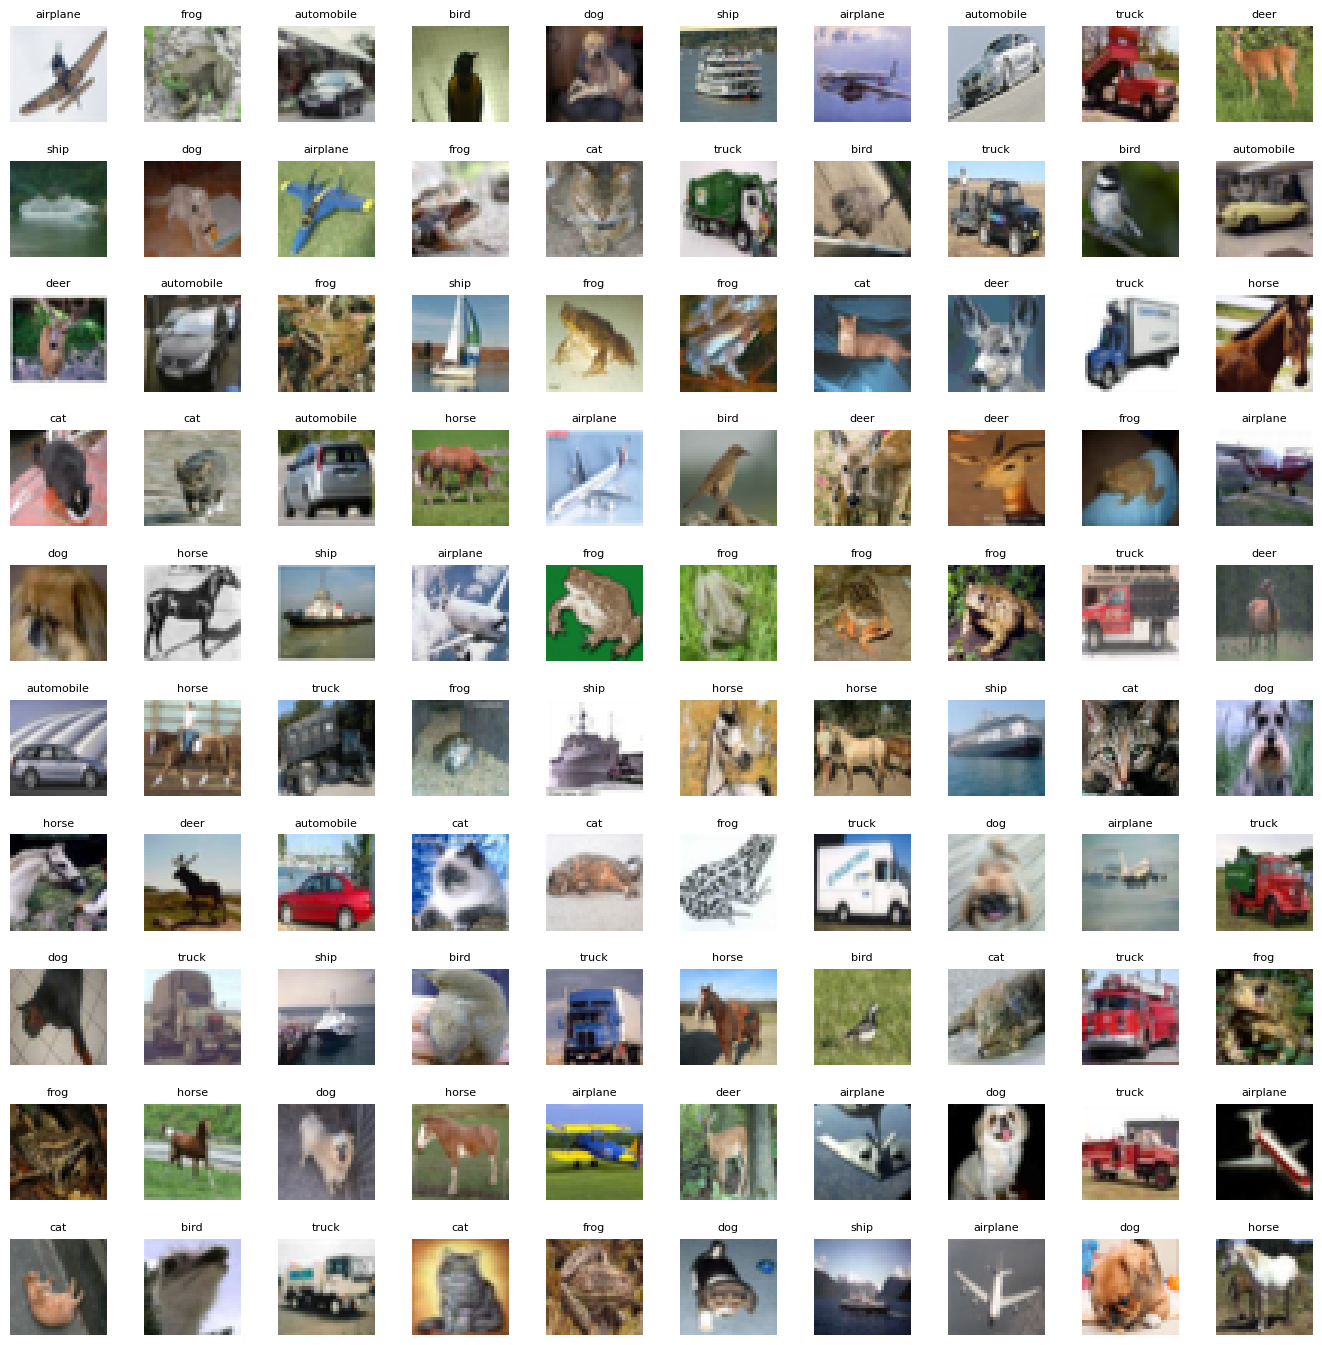

In [3]:
# Define class labels
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

# Create grid visualization
W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize=(17, 17))
axes = axes.ravel()  # Flatten to 1D array

n_train = len(X_train)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_train)
    axes[i].imshow(X_train[index])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)
plt.show()

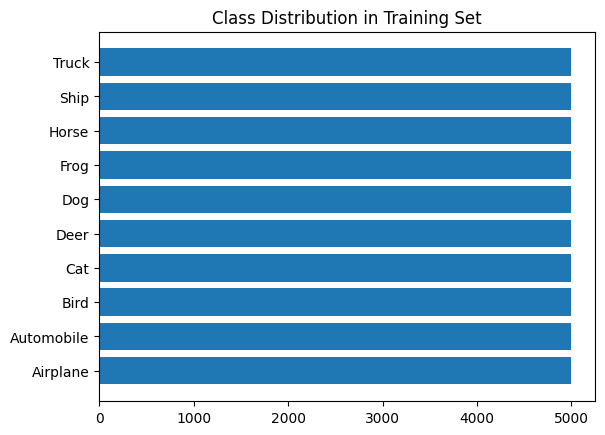

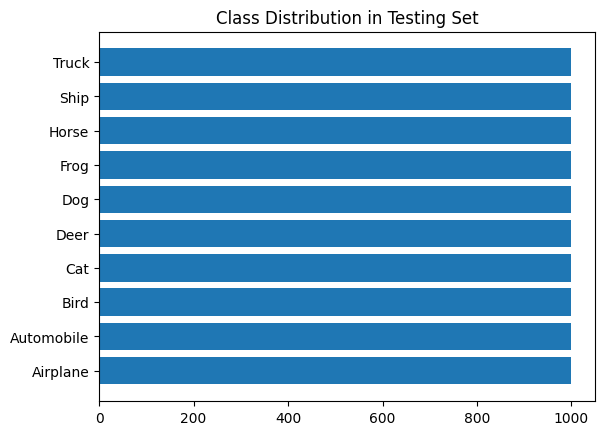

In [4]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
                'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Training set distribution
classes, counts = np.unique(y_train, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class Distribution in Training Set')
plt.show()

# Test set distribution
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class Distribution in Testing Set')
plt.show()

In [5]:
# Scale pixel values from [0, 255] to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
# Convert categorical labels to one-hot encoding
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

# Example: Label 4 (Deer) becomes [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
print(y_cat_train[0])  # Shows the one-hot encoded label

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [7]:
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)

model = Sequential()

# Block 1: 32 filters
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, 
                 input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, 
                 activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Block 2: 64 filters
model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, 
                 activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, 
                 activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Block 3: 128 filters
model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, 
                 activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, 
                 activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

C:\Users\Sumit Dahiya\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,29

 Total params: 552,362 (2.11 MB)

 Trainable params: 551,466 (2.10 MB)

 Non-trainable params: 896 (3.50 KB)

In [9]:
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=METRICS
)

In [10]:
batch_size = 32

# Create data augmentation
data_generator = ImageDataGenerator(
    width_shift_range=0.1,      # Random horizontal shift
    height_shift_range=0.1,     # Random vertical shift
    horizontal_flip=True        # Random horizontal flip
)

# Create training generator
train_generator = data_generator.flow(X_train, y_cat_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

In [11]:
# Optional: Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=2)

# Train the model
r = model.fit(
    train_generator, 
    epochs=50,
    steps_per_epoch=steps_per_epoch,
    validation_data=(X_test, y_cat_test),
    # callbacks=[early_stop],  # Uncomment to use early stopping
)

Epoch 1/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 121s 72ms/step - accuracy: 0.4056 - loss: 1.6405 - precision: 0.6217 - recall: 0.1909 - val_accuracy: 0.5078 - val_loss: 1.3211 - val_precision: 0.6603 - val_recall: 0.3631
Epoch 2/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 2:03 79ms/step - accuracy: 0.5312 - loss: 1.2246 - precision: 0.9167 - recall: 0.3438

C:\Users\Sumit Dahiya\AppData\Roaming\Python\Python313\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5312 - loss: 1.2246 - precision: 0.9167 - recall: 0.3438 - val_accuracy: 0.5123 - val_loss: 1.3102 - val_precision: 0.6643 - val_recall: 0.3687
Epoch 3/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 177s 114ms/step - accuracy: 0.5675 - loss: 1.2244 - precision: 0.7315 - recall: 0.4022 - val_accuracy: 0.6065 - val_loss: 1.1567 - val_precision: 0.7237 - val_recall: 0.5202
Epoch 4/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5000 - loss: 1.3960 - precision: 0.7333 - recall: 0.3438 - val_accuracy: 0.6043 - val_loss: 1.1506 - val_precision: 0.7211 - val_recall: 0.5179
Epoch 5/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 110s 71ms/step - accuracy: 0.6396 - loss: 1.0398 - precision: 0.7705 - recall: 0.5092 - val_accuracy: 0.6552 - val_loss: 1.0098 - val_precision: 0.7654 - val_recall: 0.5519
Epoch 6/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5938 - loss: 0.9687 - precision: 0.8000 - recall: 0.5000 - val_accuracy: 0.6462 - val_lo

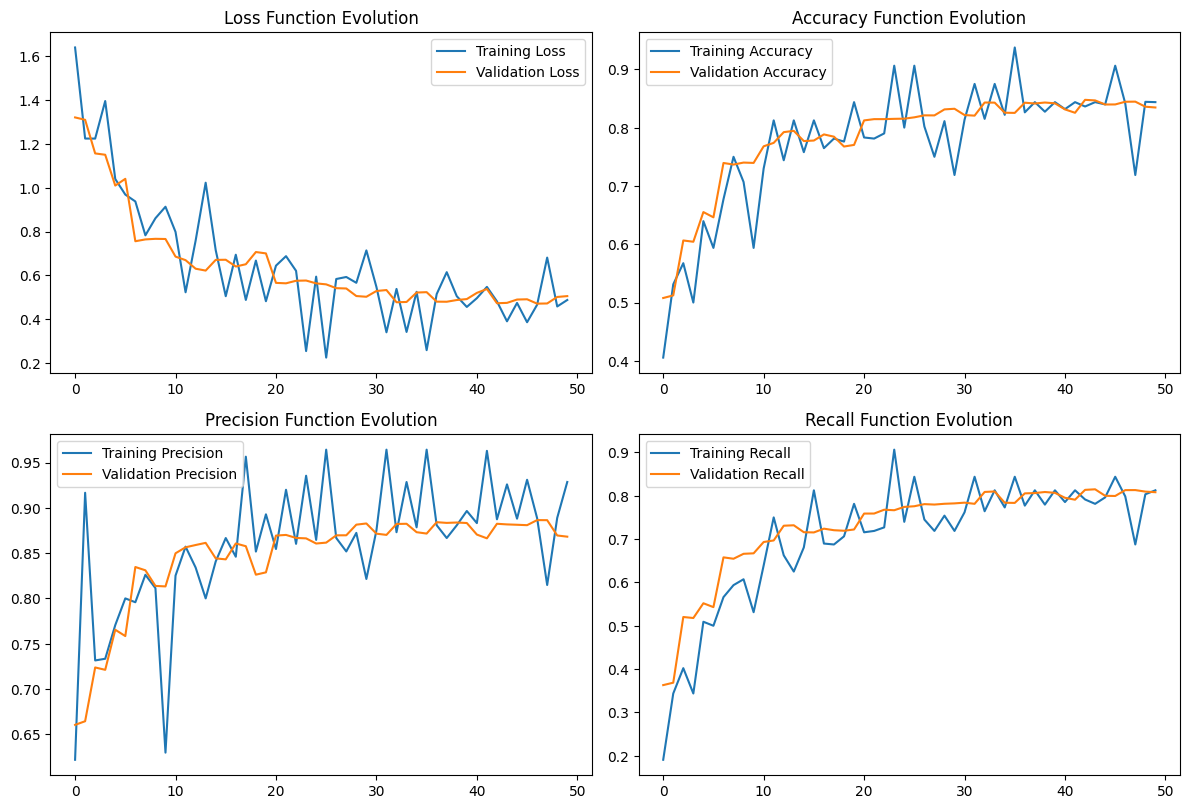

In [12]:
plt.figure(figsize=(12, 16))

# Loss evolution
plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Training Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.title('Loss Function Evolution')
plt.legend()

# Accuracy evolution
plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='Training Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

# Precision evolution
plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='Training Precision')
plt.plot(r.history['val_precision'], label='Validation Precision')
plt.title('Precision Function Evolution')
plt.legend()

# Recall evolution
plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='Training Recall')
plt.plot(r.history['val_recall'], label='Validation Recall')
plt.title('Recall Function Evolution')
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
# Get test accuracy and other metrics
evaluation = model.evaluate(X_test, y_cat_test)
print(f'Test Accuracy: {evaluation[1] * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.8346 - loss: 0.5051 - precision: 0.8682 - recall: 0.8081
Test Accuracy: 83.46%


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


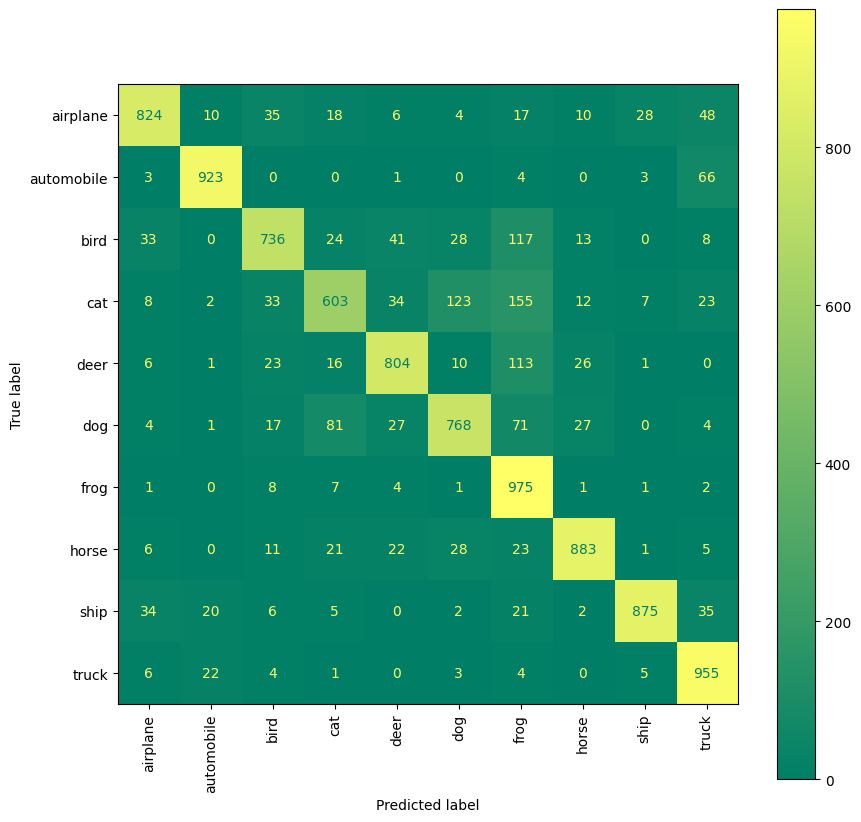

In [14]:
# Make predictions
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(xticks_rotation='vertical', ax=ax, cmap='summer')
plt.show()

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.86      1000
           1       0.94      0.92      0.93      1000
           2       0.84      0.74      0.79      1000
           3       0.78      0.60      0.68      1000
           4       0.86      0.80      0.83      1000
           5       0.79      0.77      0.78      1000
           6       0.65      0.97      0.78      1000
           7       0.91      0.88      0.89      1000
           8       0.95      0.88      0.91      1000
           9       0.83      0.95      0.89      1000

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.83      0.83     10000



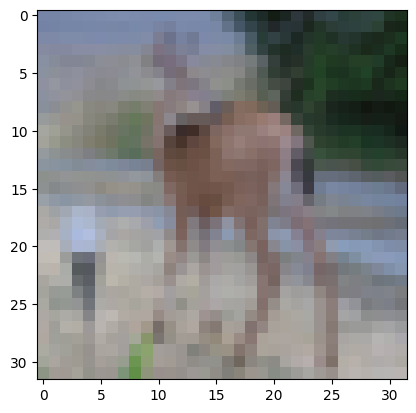

Actual Label: 4 (deer)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Predicted Label: 4 (deer)


In [16]:
# Select a test image
my_image = X_test[100]
plt.imshow(my_image)
plt.show()

print(f"Actual Label: {y_test[100][0]} ({labels[y_test[100][0]]})")

# Make prediction
pred = np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)))
print(f"Predicted Label: {pred} ({labels[pred]})")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


C:\Users\Sumit Dahiya\AppData\Local\Temp\ipykernel_14904\3395537617.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(f"{labels[predicted_label]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})",
C:\Users\Sumit Dahiya\AppData\Local\Temp\ipykernel_14904\3395537617.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predictions_array, true_label = predictions_array, int(true_label[i])


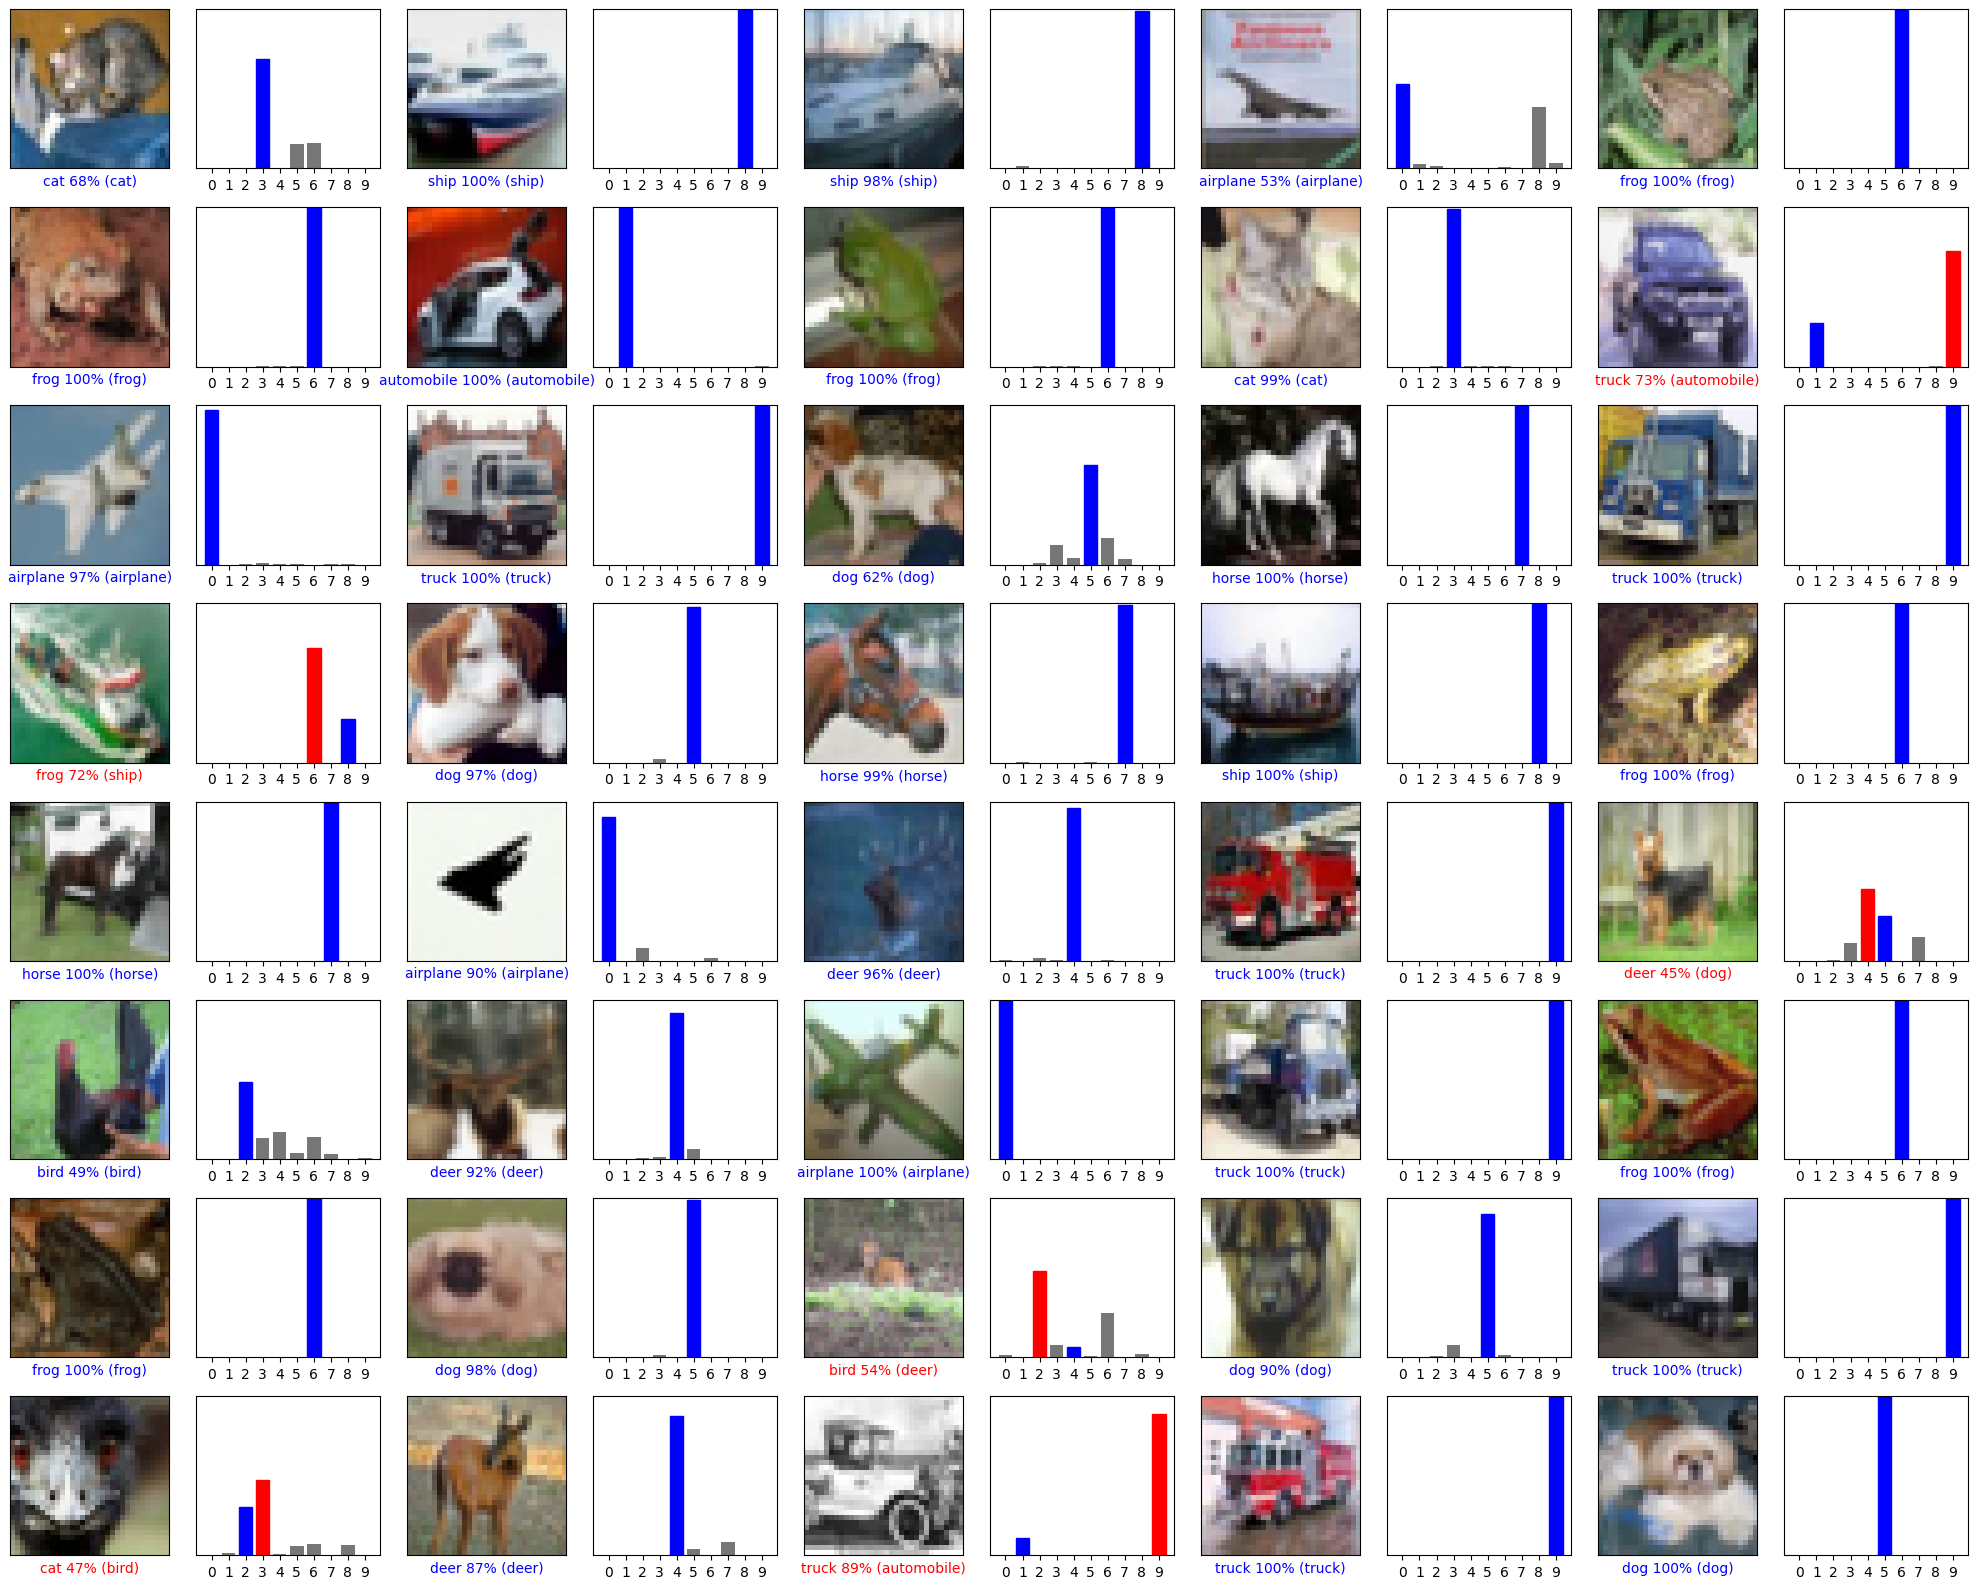

In [17]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'
    
    plt.xlabel(f"{labels[predicted_label]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})", 
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, int(true_label[i])
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Plot predictions
predictions = model.predict(X_test)
num_rows, num_cols = 8, 5
num_images = num_rows * num_cols

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)

plt.tight_layout()
plt.show()

In [15]:
#  IMPORT ALL REQUIRED LIBRARIES
from keras.applications.densenet import DenseNet121
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import numpy as np

# LOAD AND PREPARE DATA 
# Uncomment this section if X_train is not defined
print("Loading CIFAR-10 dataset...")
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

# 3. Create DenseNet model
print("\nCreating DenseNet121 model...")
model = Sequential()

base_model = DenseNet121(
    input_shape=(32, 32, 3), 
    include_top=False,        # Remove the top classification layer
    weights='imagenet',       # Use ImageNet pre-trained weights
    pooling='avg'             # Use average pooling
)

model.add(base_model)
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

print("Model compiled successfully!")

# CREATE train_generator with data augmentation
batch_size = 32

data_generator = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_generator = data_generator.flow(X_train, y_cat_train, batch_size=batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

print(f"Steps per epoch: {steps_per_epoch}")

# Train the model
print("\nTraining DenseNet121 model...")
r = model.fit(
    train_generator, 
    epochs=100,
    steps_per_epoch=steps_per_epoch,
    validation_data=(X_test, y_cat_test),
    verbose=1
)

# Evaluate the model
print("\n" + "="*50)
print("DenseNet Model Training Complete!")
print("="*50)
print(f"Final Training Accuracy: {r.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {r.history['val_accuracy'][-1]:.4f}")

# Make predictions
print("\nMaking predictions on test set...")
y_pred_densenet = model.predict(X_test)
y_pred_densenet = np.argmax(y_pred_densenet, axis=1)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_densenet))

# Save the model
print("\nSaving model...")
model.save('densenet_cifar10.h5')
print("Model saved as 'densenet_cifar10.h5'")

Loading CIFAR-10 dataset...
X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)

Creating DenseNet121 model...
Model compiled successfully!
Steps per epoch: 1562

Training DenseNet121 model...
Epoch 1/100
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 946s 535ms/step - accuracy: 0.5019 - loss: 1.4642 - val_accuracy: 0.4996 - val_loss: 1.4937
Epoch 2/100
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 6:03 233ms/step - accuracy: 0.5938 - loss: 1.1090

C:\Users\Sumit Dahiya\AppData\Roaming\Python\Python313\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.5938 - loss: 1.1090 - val_accuracy: 0.5063 - val_loss: 1.4880
Epoch 3/100
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 489s 313ms/step - accuracy: 0.6013 - loss: 1.1758 - val_accuracy: 0.4753 - val_loss: 1.8843
Epoch 4/100
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.5625 - loss: 1.0110 - val_accuracy: 0.4679 - val_loss: 1.9937
Epoch 5/100
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 414s 265ms/step - accuracy: 0.6481 - loss: 1.0527 - val_accuracy: 0.6403 - val_loss: 1.0413
Epoch 6/100
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6562 - loss: 0.9025 - val_accuracy: 0.6456 - val_loss: 1.0266
Epoch 7/100
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 437s 280ms/step - accuracy: 0.6734 - loss: 0.9583 - val_accuracy: 0.6330 - val_loss: 1.2762
Epoch 8/100
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7188 - loss: 0.7634 - val_accuracy: 0.6359 - val_loss: 1.5648
Epoch 9/100
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 433s 277ms/step - accuracy: 0.69

KeyboardInterrupt: 

In [16]:
from tensorflow.keras.models import load_model

# Save the trained model
model.save('cnn_cifar10.h5')

# Load the model later
loaded_model = load_model('cnn_cifar10.h5')